# 10 - Customizations

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import urllib
import matplotlib.dates as mdates


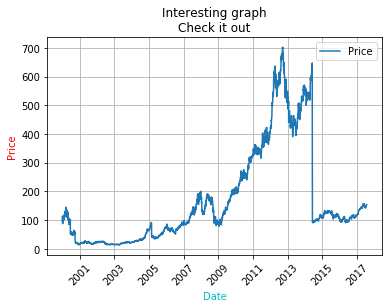

In [2]:

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graph_data():

    fig = plt.figure()
    ax1 = plt.subplot2grid((1, 1), (0, 0))

    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split('\n')
    
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'Volume' not in line:
                stock_data.append(line)
    
    date, openp, highp, lowp, closep, adjustedp, volume = np.loadtxt(stock_data,
                                                                     delimiter=',',
                                                                     unpack=True,
                                                                     converters={0: bytespdate2num('%Y-%m-%d')})
    ax1.plot_date(date, closep, '-', label='Price')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    
    ax1.grid(True) #, color='g', linestyle='-')

    # We can change axis label colors by:
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')

    # We can set custom ranges for our axes
    ax1.set_yticks([0,100, 200, 300, 400, 500, 600, 700])

    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting graph\nCheck it out')
    plt.legend()
    plt.show()

graph_data()    